### Understanding Generalization in Machine Learning

Generalization refers to the ability of a machine learning model to perform well on new, unseen data, which was not used during the training process. The ultimate goal of a machine learning model is to make accurate predictions on future or unseen data, and generalization is a measure of how well a model achieves this goal.

#### Importance of Generalization

Generalization is crucial because it determines the practical usefulness of a model. A model that performs exceptionally well on training data but poorly on unseen data (a phenomenon known as overfitting) is of limited use in real-world applications. The true test of a model's effectiveness is its performance on new data, reflecting its ability to adapt to the complexities and variations it hasn't explicitly been trained on.

#### Factors Affecting Generalization

1. **Model Complexity**: More complex models with a large number of parameters can fit a wide variety of functions but are also more prone to overfitting. Simplifying the model or using techniques like regularization can help improve generalization.

2. **Training Data Size**: Generally, the more training data available, the better the model can generalize. More data provides a more comprehensive representation of the underlying data distribution, reducing the model's chances of fitting to noise and specific peculiarities in the training set.

3. **Noise in Data**: High noise levels in the training data can lead to poor generalization because the model might learn the noise as if it were a part of the signal. It's crucial to clean the data and possibly use noise reduction techniques during preprocessing.

4. **Training Techniques**: Techniques such as cross-validation, regularization (like L1 and L2), and dropout in neural networks are designed to improve a model's generalization capabilities. These techniques help in preventing the model from becoming too fitted to the training data.

#### Measuring Generalization

Generalization is typically measured by the difference in performance (often error metrics like MSE, MAE, etc.) between the training set and a validation/test set. A small gap between training and test performance usually indicates good generalization.


In summary, generalization is a fundamental concept in machine learning that not only guides the training process but also provides a benchmark for the model's future performance on unseen data. Ensuring good generalization is key to developing robust machine learning applications that perform well in real-world scenarios.


### Training and Test Error

- **Training (Empirical) Error**:
  $$
  J_{\text{train}}(w) = \frac{1}{n} \sum_{i=1}^n (y^{(i)} - h_w(x^{(i)}))^2
  $$
  This measures the average squared difference between the actual outputs and the predictions made by the model on the training data. It represents the model's accuracy on the data it was trained on.

- **Test Error**:
  $$
  J_{\text{test}}(w) = \frac{1}{m} \sum_{i=1}^m (y_{\text{test}}^{(i)} - h_w(x_{\text{test}}^{(i)}))^2
  $$
  This measures the average squared difference between the actual outputs and the predictions made by the model on new, unseen data. It is a measure of how well the model generalizes to new data.

### Overfitting and Underfitting

- **Overfitting**:
  - **Description**: A model fits the training data very well but performs poorly on the test set.
  - **Mathematical Expression**: $ J_{\text{train}}(w) \ll J_{\text{test}}(w) $
  - **Causes**: The model is too complex and has high variance.
  - **Consequence**: The model captures noise in the training data and fails to generalize well to unseen data.

- **Underfitting**:
  - **Description**: The model is too simple and cannot capture the structure of the data.
  - **Mathematical Expression**: $ J_{\text{train}}(w) \approx J_{\text{test}}(w) \gg 0 $
  - **Causes**: The model lacks complexity and has high bias.
  - **Consequence**: Poor fit on both training and test data, indicating that the model is not capable of capturing the underlying trends in the data.

### Goal

- The primary goal in model training is to minimize the test error, which helps in achieving good generalization on unseen data.



## Bias-Variance Decomposition

### Generalization Error Decomposition

The expected generalization error can be decomposed into three components:

$$ \mathbb{E}[(y-h_w(x))^2] = (\text{Bias})^2 + \text{Variance} + \text{Noise} $$

Where each component represents:

#### 1. Bias
Error due to simplifying assumptions in the model:
$$ \text{Bias}(x) = \mathbb{E}[h_w(x)] - f(x) $$

#### 2. Variance
Sensitivity of the model to training data:
$$ \text{Variance}(x) = \mathbb{E}[(h_w(x) - \mathbb{E}[h_w(x)])^2] $$

#### 3. Noise
Irreducible error from the inherent randomness in data

### Mathematical Proof

Let's prove this decomposition step by step:

#### Initial Assumptions
- $f(x)$ is the ground truth
- Observation $y$ is a noisy observation: $y = f(x) + \epsilon$
- $\epsilon \sim \mathcal{N}(0,\sigma^2)$

#### Step 1: Expected Squared Error
We start with:
$$ \mathbb{E}_{data}[(\hat{f}(x) - y)^2] = \mathbb{E}_{data}[(\hat{f}(x) - f(x) + \epsilon)^2] $$

This expands to:
$$ = \mathbb{E}[(\hat{f}(x) - f(x))^2 - 2\epsilon(\hat{f}(x) - f(x)) + \epsilon^2] $$

#### Step 2: Noise Properties
Since $\epsilon$ has zero mean and variance $\sigma^2$:
- $\mathbb{E}[\epsilon] = 0$
- $\mathbb{E}[\epsilon^2] = \sigma^2$
- $\mathbb{E}[-2\epsilon(\hat{f}(x) - f(x))] = 0$

#### Step 3: Decomposition
We can decompose the squared difference $(\hat{f}(x) - f(x))^2$ as:

$$ \mathbb{E}[(\hat{f}(x) - f(x))^2] = \mathbb{E}[(\hat{f}(x) - \mathbb{E}[\hat{f}(x)] + \mathbb{E}[\hat{f}(x)] - f(x))^2] $$

Expanding further:
$$ = \mathbb{E}[(\hat{f}(x) - \mathbb{E}[\hat{f}(x)])^2] + \mathbb{E}[(\mathbb{E}[\hat{f}(x)] - f(x))^2] + 2\mathbb{E}[(\hat{f}(x) - \mathbb{E}[\hat{f}(x)])(\mathbb{E}[\hat{f}(x)] - f(x))] $$

Since $\mathbb{E}[\epsilon A] = \mathbb{E}[\epsilon]\mathbb{E}[A]$, $A$ and $\epsilon$ are independent and $\mathbb{E}[\epsilon]$ we have $\mathbb{E}[\epsilon A] = 0$ thus:

$$ \mathbb{E}[\mathbb{E}[\hat{f}(x)]-\hat{f}(x)] = \mathbb{E}[\hat{f}(x)] - \mathbb{E}[\hat{f}(x)] = 0 $$

#### now we have:
$$ 2\mathbb{E}[(\hat{f}(x) - \mathbb{E}[\hat{f}(x)])(\mathbb{E}[\hat{f}(x)] - f(x))] = 0$$

#### thuth:
$$ 
\mathbb{E}_{data}[(\hat{f}(x) - y)^2] = \mathbb{E}[(\hat{f}(x) - \mathbb{E}[\hat{f}(x)])^2] + \mathbb{E}[(\mathbb{E}[\hat{f}(x)] - f(x))^2] + \epsilon^2
$$

#### Final Result
Thus, the expected squared error becomes:

$$ \mathbb{E}_{data}[(\hat{f}(x_n) - y)^2] = \text{Variance} + \text{Bias}^2 + \sigma^2 $$

where:
- Variance = $\mathbb{E}[(\hat{f}(x) - \mathbb{E}[\hat{f}(x)])^2]$
- Bias = $\mathbb{E}[\hat{f}(x)] - f(x)$
###### $$ \mathbb{E}[(\mathbb{E}[\hat{f}(x)] - f(x))^2] $$
###### 
###### This expression represents the squared bias term in the bias-variance decomposition. Let's break down what it means:
###### 
###### 1. $\mathbb{E}[\hat{f}(x)]$ is the expected value (average) of our model's predictions
###### 2. $f(x)$ is the true function we're trying to approximate
###### 3. $\mathbb{E}[\hat{f}(x)] - f(x)$ is the bias - how far off our model is on average
###### 4. The outer $\mathbb{E}[...]^2$ squares this difference to make it positive and penalize larger errors more heavily

- Noise = $\sigma^2$

This decomposition helps us understand the trade-off between bias and variance in machine learning models, and why we can't eliminate all sources of error simultaneously.

## Bias-Variance Analysis in Machine Learning Models

### High Bias in Simple Models

**Explanation**: Simple models, such as linear regression, often underfit

$$ h_w(x) = w_0 + w_1x $$

- Bias remains large even with infinite data
$$ \text{Bias}^2 \gg \text{Variance} $$

- Leads to large generalization error

### High Variance in Complex Models

**Explanation**: Complex models tend to overfit

$$ h_w(x) = w_0 + w_1x + w_2x^2 + \cdots + w_mx^m $$

- Variance dominates when the model is too complex
$$ \text{Variance} \gg \text{Bias} $$

- Fits noise, leading to high test error

### Bias-Variance Tradeoff

**Tradeoff**: Balancing between bias and variance is key for optimal performance

- Low complexity: High bias, low variance
- High complexity: Low bias, high variance

#### Key Points:
1. Simple models (high bias):
   - Underfitting
   - Consistent but inaccurate predictions
   - Adding more data doesn't help much

2. Complex models (high variance):
   - Overfitting
   - Inconsistent predictions
   - Very sensitive to training data

3. Optimal model:
   - Balances complexity
   - Minimizes total error
   - Appropriate for the problem complexity

## Regularization in Machine Learning

### Purpose and Definition

**Purpose**: Prevent overfitting by penalizing large weights

$$ J_\lambda(w) = J(w) + \lambda R(w) $$

- Common regularizers: L1 and L2 norms
- $\lambda$ controls the balance between fit and simplicity

### Effect of Regularization Parameter $\lambda$

#### Balancing Fit and Complexity:

$$ J_\lambda(w) = J(w) + \lambda \sum_{j=1}^{m} w_j^2 = J(w) + \lambda \mathbf{w}^T\mathbf{w} $$

- **Large $\lambda$**: Forces smaller weights, reduces complexity, increases bias, decreases variance
- **Small $\lambda$**: Allows larger weights, increases complexity, reduces bias, increases variance

#### Mathematical Form for Polynomial Regression:

![Image description](../../../Images/lamda-effect.png)

$$ J_\lambda(w) = \sum_{i=1}^{n} (t^{(n)} - f(\mathbf{x}^{(n)};\mathbf{w}))^2 + \lambda\mathbf{w}^T\mathbf{w} $$

$$ f(\mathbf{x}^{(n)};\mathbf{w}) = w_0 + w_1x + \cdots + w_9x^9 $$

### Visual Evidence of Regularization Effects

#### Impact on Model Fitting:

- **High regularization (ln λ = 0)**: Nearly linear fit, high bias
- **Medium regularization (ln λ = -18)**: Balanced fit capturing main trends
- **Low regularization (ln λ = -∞)**: Complex fit capturing noise (M = 9)

#### Effect on Weight Values:

| Weight | ln λ = -∞ | ln λ = -18 | ln λ = 0 |
|--------|-----------|------------|----------|
| w₀* | 0.35 | 0.35 | 0.13 |
| w₁* | 232.37 | 4.74 | -0.05 |
| w₂* | -5321.83 | -0.77 | -0.06 |
| w₃* | 48568.31 | -31.97 | -0.05 |
| ... | ... | ... | ... |
| w₉* | 125201.43 | 72.68 | 0.01 |

_Table adapted from Machine Learning and Pattern Recognition, Bishop_

#### Regularization Parameter Optimization

![Image description](../../../Images/ErmsForlamda.png)

- $\lambda$ controls the effective complexity of the model
- Hence the degree of overfitting
- Optimal λ value is where test error is minimized (around ln λ = -30 in graph)
- Training error always increases with regularization, but test error forms a U-shape

_Figures adapted from Machine Learning and Pattern Recognition, Bishop_

## 🔹 **1. Ridge Regression (L2 Regularization)**
### **Concept**
Ridge regression adds an **L2 penalty** to the standard least squares loss function. This penalty is the **sum of the squared values of the model's coefficients**:

$$
\text{Loss} = \sum (y_i - \hat{y}_i)^2 + \lambda \sum w_j^2
$$

- The first term is the usual sum of squared errors.
- The second term is the L2 penalty, where $\lambda$ controls the strength of regularization.
- **Larger $\lambda$ values** shrink the coefficients closer to zero but never exactly zero.
- Ridge regression helps when features are **highly correlated** (multicollinearity), distributing weights more evenly among them.

### **Effect on Coefficients**
- **Does not eliminate** coefficients (weights), just **reduces their magnitude**.
- Helps reduce model complexity but keeps all features.

---

## 🔹 **2. Lasso Regression (L1 Regularization)**
### **Concept**
Lasso regression adds an **L1 penalty** to the loss function, which is the **sum of the absolute values of the coefficients**:

$$
\text{Loss} = \sum (y_i - \hat{y}_i)^2 + \lambda \sum |w_j|
$$

- The first term is the usual sum of squared errors.
- The second term is the L1 penalty, which encourages some weights to be exactly **zero**.
- **Larger $\lambda$ values** result in more features being eliminated (coefficient = 0), effectively performing **feature selection**.

### **Effect on Coefficients**
- **Can set some coefficients to exactly zero**, making it useful for feature selection.
- Helps simplify models and improve interpretability.

---

## 🔹 **Comparison: Ridge vs. Lasso**
| Feature | Ridge Regression | Lasso Regression |
|---------|----------------|----------------|
| Regularization Type | L2 (squared weights) | L1 (absolute weights) |
| Effect on Coefficients | Shrinks but does not eliminate | Can eliminate (set to zero) |
| When to Use? | If you want to **reduce** weights but keep all features | If you want to **select important features** |
| Best for | **Multicollinearity** (highly correlated features) | **Sparse models** (few significant predictors) |

---

## 🔹 **3. Elastic Net (Combination of Ridge & Lasso)**
Since Ridge and Lasso have different strengths, **Elastic Net** combines both:

$$
\text{Loss} = \sum (y_i - \hat{y}_i)^2 + \lambda_1 \sum |w_j| + \lambda_2 \sum w_j^2
$$

- Uses **both L1 and L2 penalties**.
- Useful when **features are correlated and some feature selection is needed**.

---

## 🔹 **5. When to Use Ridge or Lasso?**
- Use **Ridge** if you have **many correlated variables** and want to keep them all.
- Use **Lasso** if you want **automatic feature selection** and a simpler model.

In [1]:
# Import required libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
import matplotlib.pyplot as plt

In [2]:
# Function to compute Root Mean Square Error
def compute_rms_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Function to generate synthetic data following y = x^2 - 2x + noise
def generate_data(n=100, noise=10.0):
    np.random.seed(42)  # Set seed for reproducibility
    X = np.random.uniform(-10, 10, n)  # Generate random X values
    y = X**2 - 2 * X + np.random.randn(n) * noise  # Generate y with quadratic relationship and noise
    return X, y

In [3]:
# Generate dataset with 15 samples
X, y = generate_data(n=15)
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define polynomial degrees and regularization strengths (lambda values)
degrees = [2, 4, 6, 8]  # Different polynomial degrees to test
ln_lambdas = [10, 5, 0, -5, -10]  # ln(lambda) values
lambdas = np.round(np.exp(ln_lambdas), decimals=3)  # Convert to lambda values with 3 decimal places

In [4]:
# Print the relationship between ln(lambda) and lambda
print("\nRelationship between ln(lambda) and lambda values:")
for ln_lambda, lambda_val in zip(ln_lambdas, lambdas):
    print(f"ln(lambda) = {ln_lambda:6.2f} → lambda = {lambda_val:10.3f}")

print("\nFormulas with actual lambda values:")
print("Ridge Loss = Σ(yi - ŷi)² + λΣwj²")
for lambda_val in lambdas:
    print(f"When λ = {lambda_val:10.8f}: Loss = Σ(yi - ŷi)² + {lambda_val:10.3f}Σwj²")

print("\nLasso Loss = Σ(yi - ŷi)² + λΣ|wj|")
for lambda_val in lambdas:
    print(f"When λ = {lambda_val:10.8f}: Loss = Σ(yi - ŷi)² + {lambda_val:10.3f}Σ|wj|")


Relationship between ln(lambda) and lambda values:
ln(lambda) =  10.00 → lambda =  22026.466
ln(lambda) =   5.00 → lambda =    148.413
ln(lambda) =   0.00 → lambda =      1.000
ln(lambda) =  -5.00 → lambda =      0.007
ln(lambda) = -10.00 → lambda =      0.000

Formulas with actual lambda values:
Ridge Loss = Σ(yi - ŷi)² + λΣwj²
When λ = 22026.46600000: Loss = Σ(yi - ŷi)² +  22026.466Σwj²
When λ = 148.41300000: Loss = Σ(yi - ŷi)² +    148.413Σwj²
When λ = 1.00000000: Loss = Σ(yi - ŷi)² +      1.000Σwj²
When λ = 0.00700000: Loss = Σ(yi - ŷi)² +      0.007Σwj²
When λ = 0.00000000: Loss = Σ(yi - ŷi)² +      0.000Σwj²

Lasso Loss = Σ(yi - ŷi)² + λΣ|wj|
When λ = 22026.46600000: Loss = Σ(yi - ŷi)² +  22026.466Σ|wj|
When λ = 148.41300000: Loss = Σ(yi - ŷi)² +    148.413Σ|wj|
When λ = 1.00000000: Loss = Σ(yi - ŷi)² +      1.000Σ|wj|
When λ = 0.00700000: Loss = Σ(yi - ŷi)² +      0.007Σ|wj|
When λ = 0.00000000: Loss = Σ(yi - ŷi)² +      0.000Σ|wj|


/home/alireza/Documents/pyvenv/lib/python3.12/site-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/alireza/Documents/pyvenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/alireza/Documents/pyvenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.555e+02, tolerance: 1.426e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridg

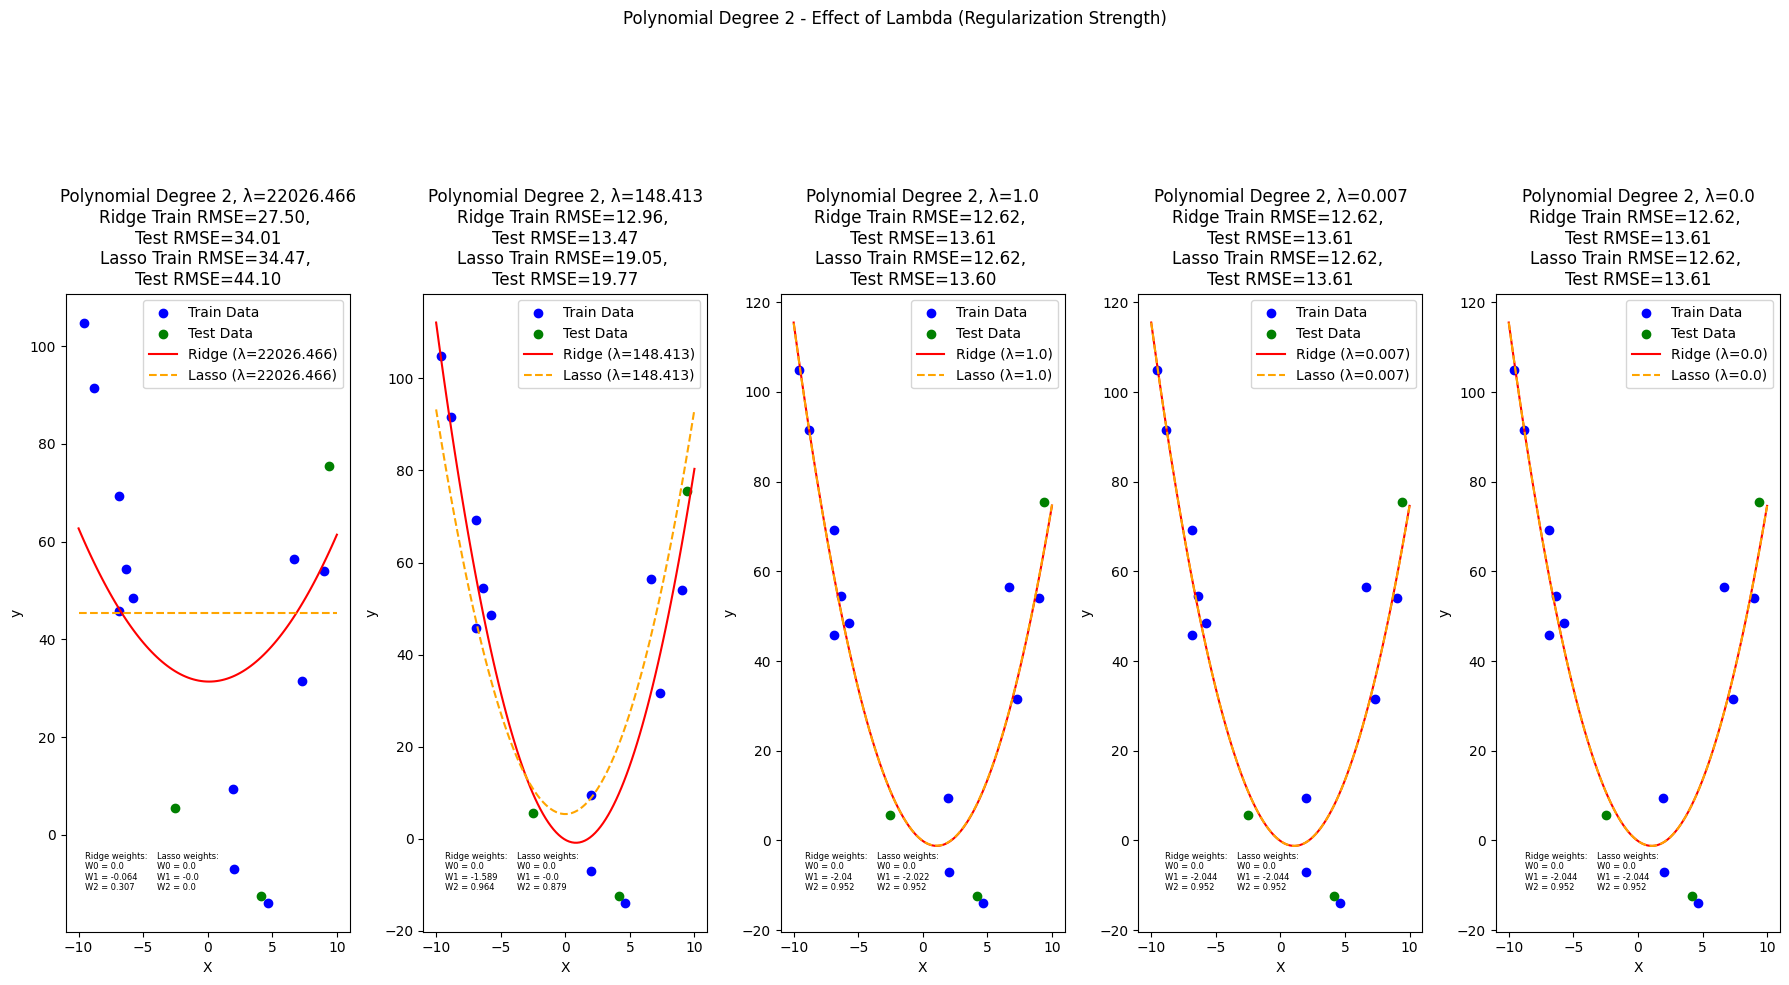

/home/alireza/Documents/pyvenv/lib/python3.12/site-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/alireza/Documents/pyvenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/alireza/Documents/pyvenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.293e+02, tolerance: 1.426e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridg

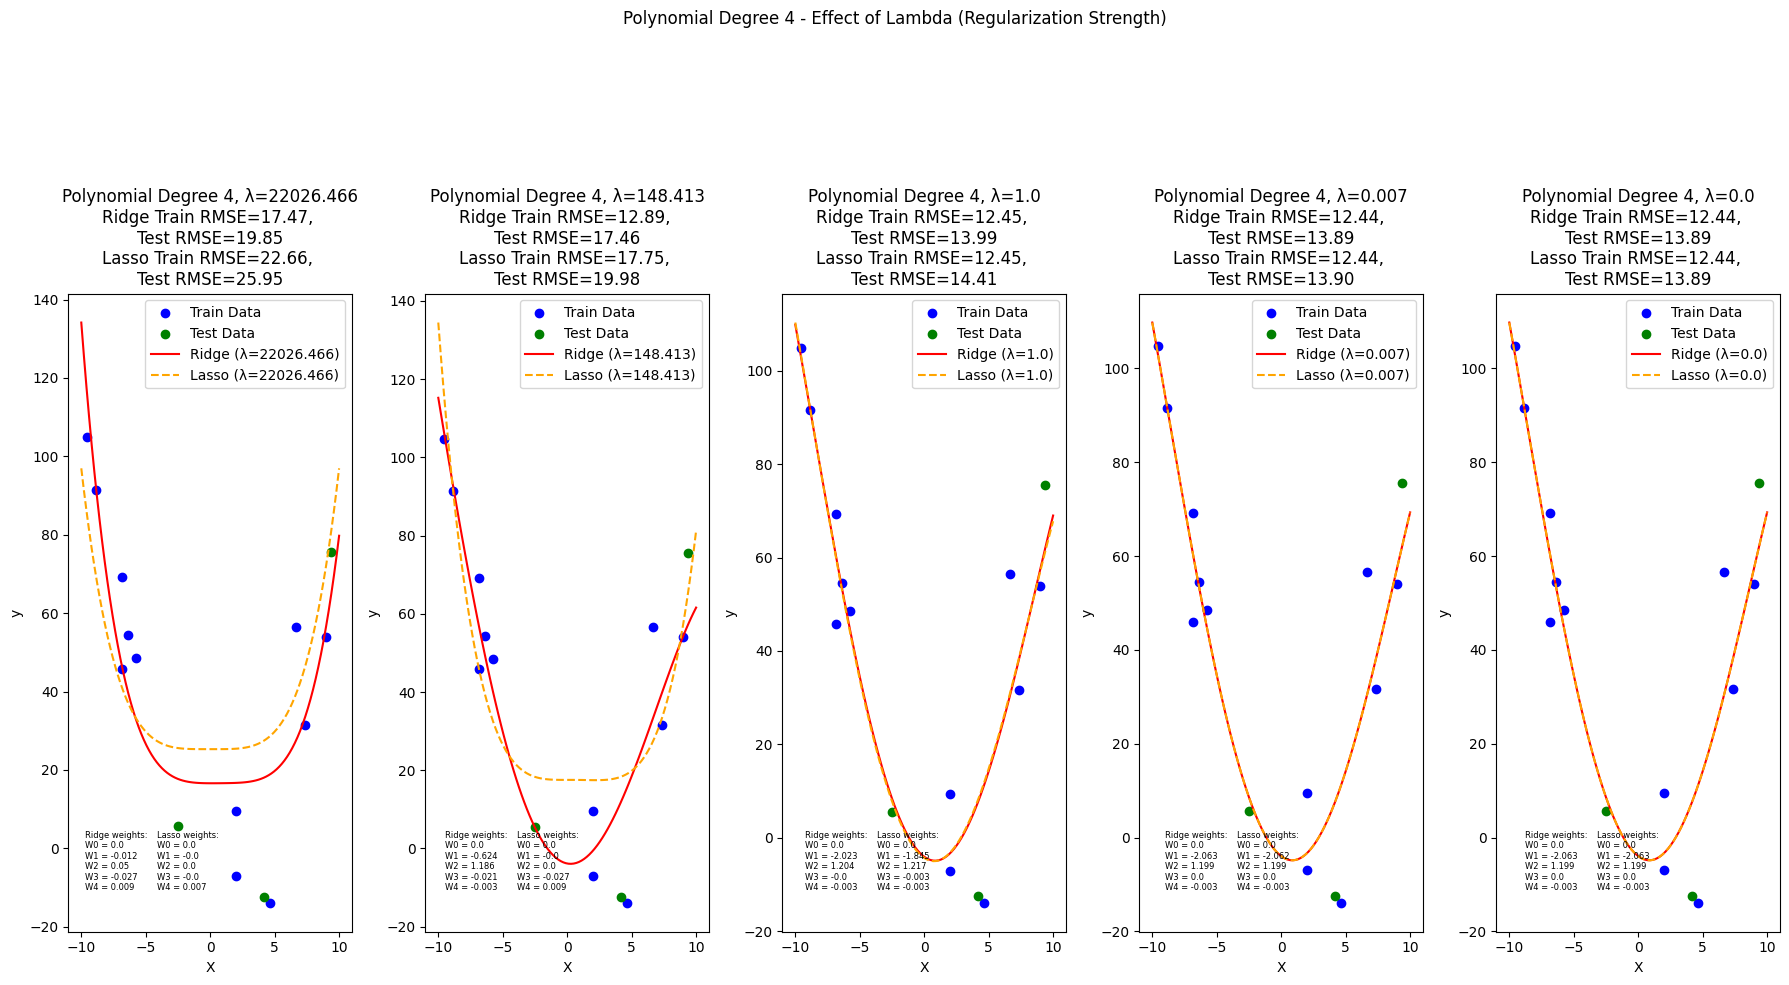

/home/alireza/Documents/pyvenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.735e+00, tolerance: 1.426e+00
  model = cd_fast.enet_coordinate_descent(
/home/alireza/Documents/pyvenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.862e+02, tolerance: 1.426e+00
  model = cd_fast.enet_coordinate_descent(
/home/alireza/Documents/pyvenv/lib/python3.12/site-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/alirez

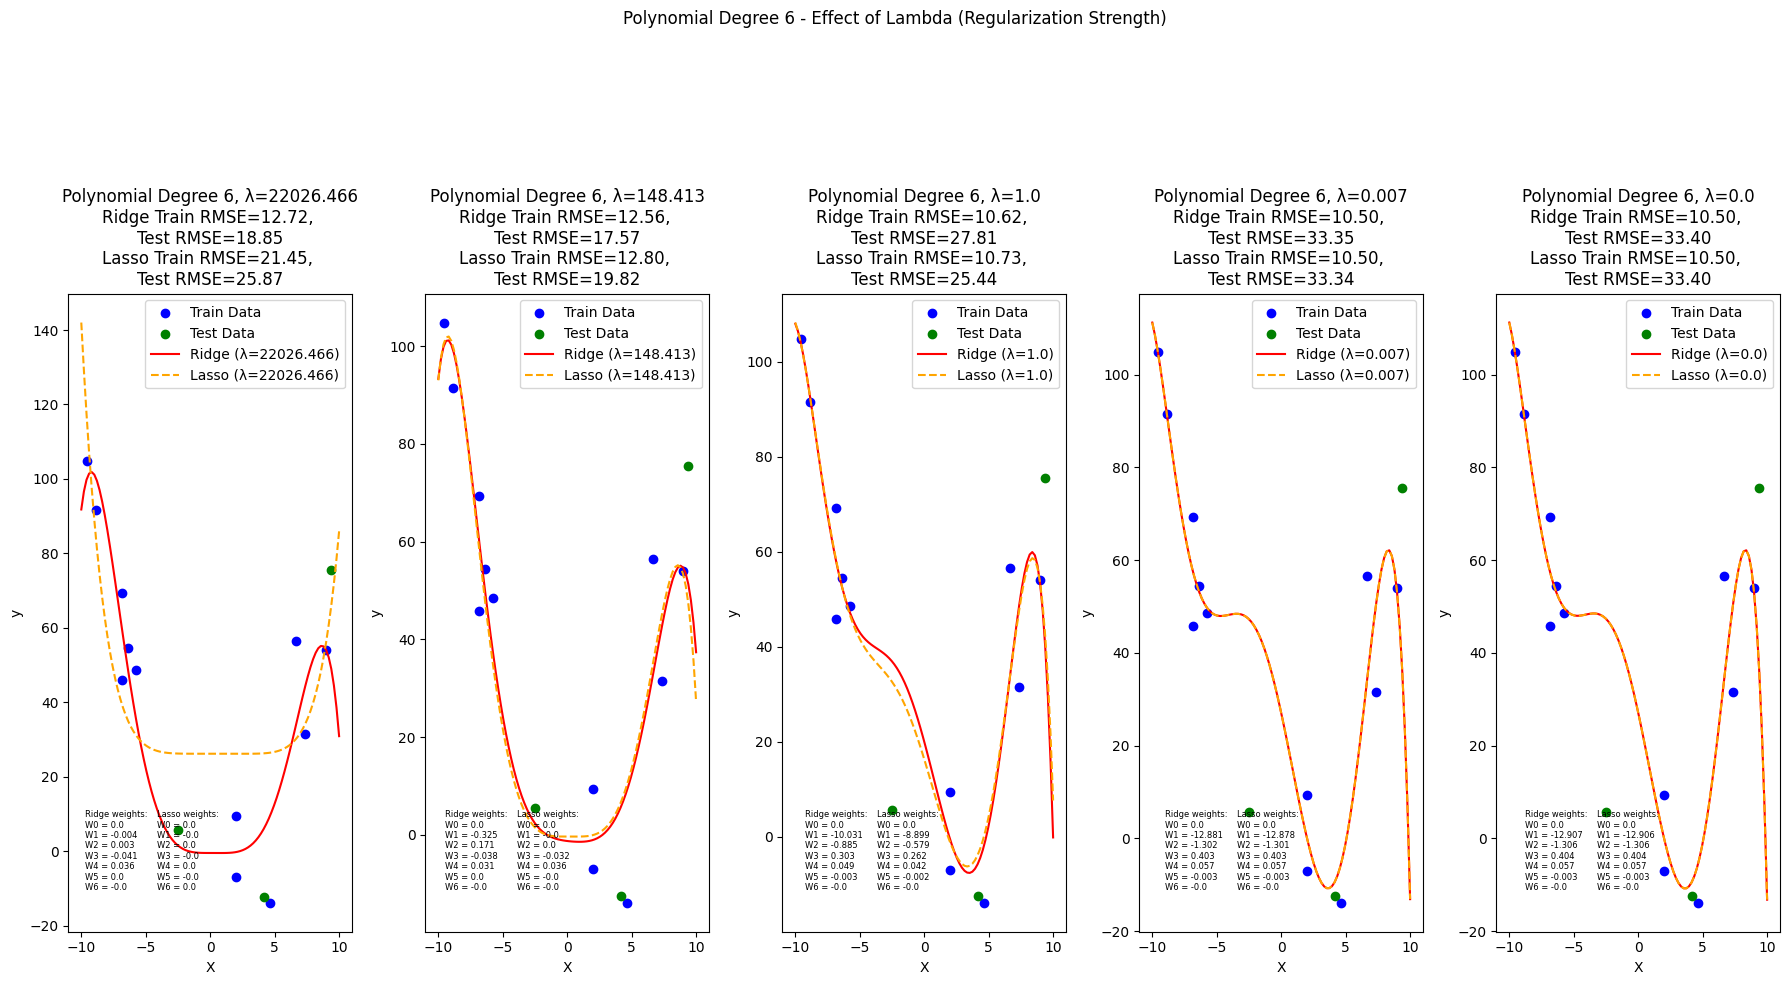

/home/alireza/Documents/pyvenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.524e+02, tolerance: 1.426e+00
  model = cd_fast.enet_coordinate_descent(
/home/alireza/Documents/pyvenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.824e+02, tolerance: 1.426e+00
  model = cd_fast.enet_coordinate_descent(
/home/alireza/Documents/pyvenv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.10841e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/alireza/

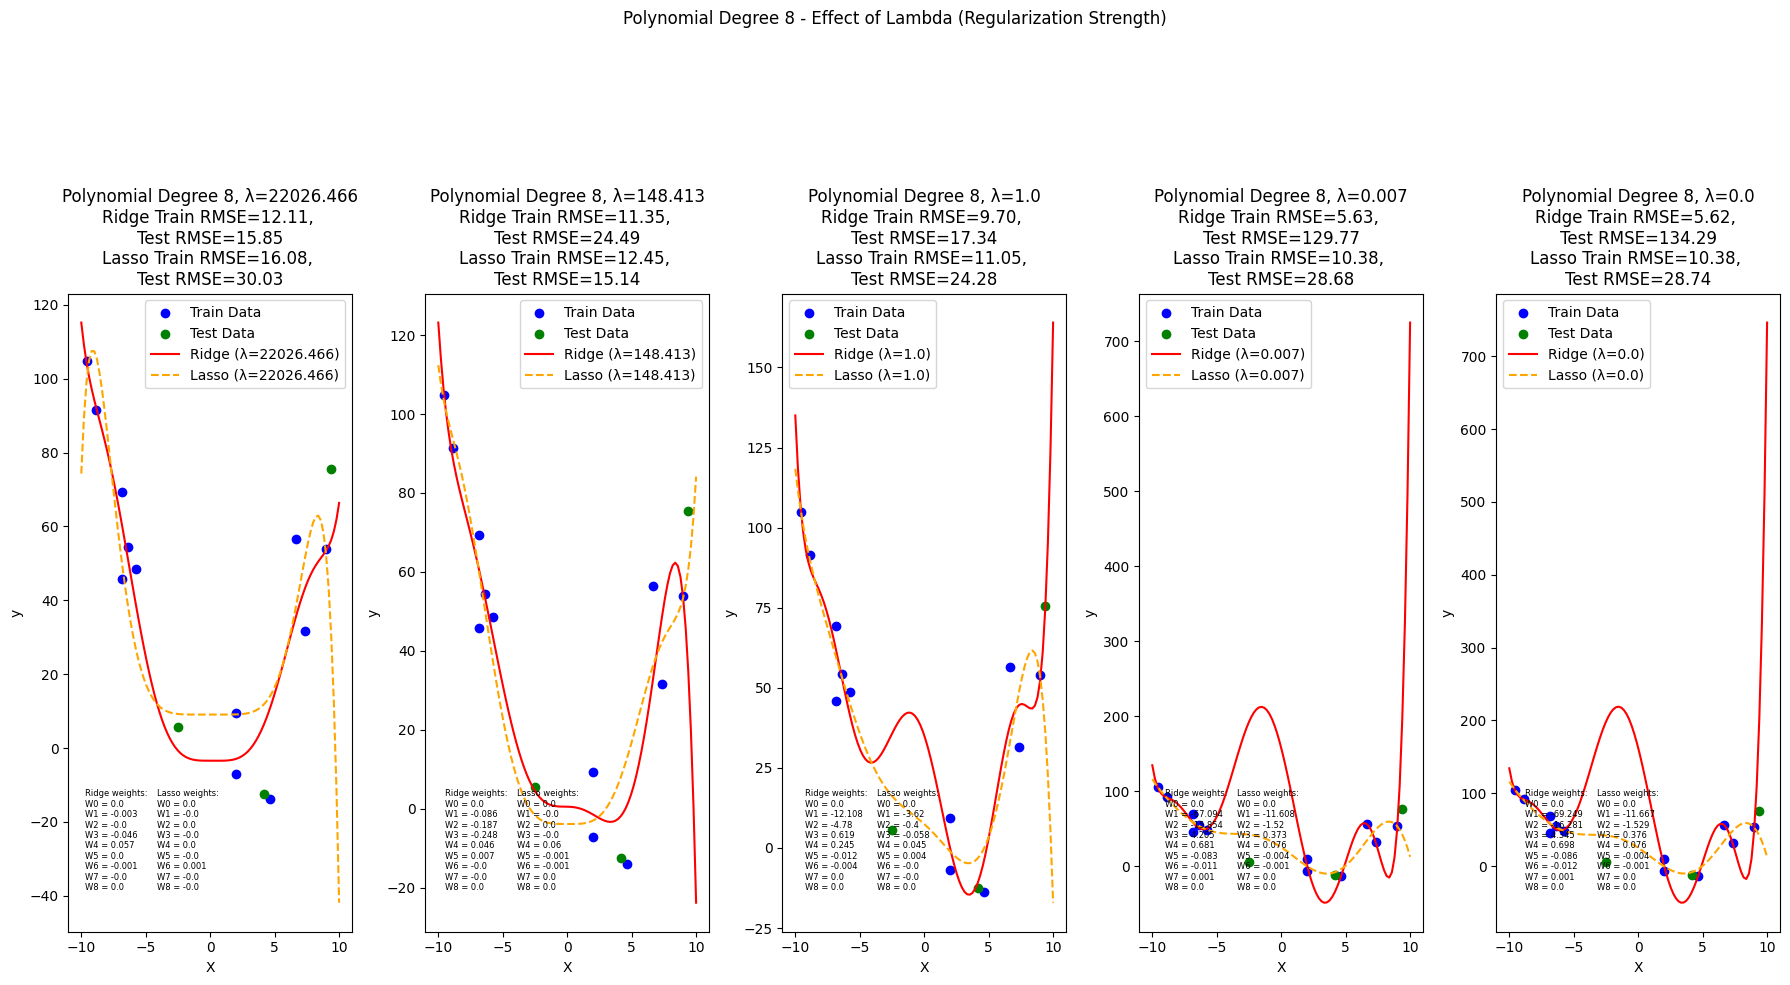

In [5]:
# Initialize arrays to store RMSE values
ridge_rmse_train = np.zeros((len(degrees), len(lambdas)))
ridge_rmse_test = np.zeros((len(degrees), len(lambdas)))
lasso_rmse_train = np.zeros((len(degrees), len(lambdas)))
lasso_rmse_test = np.zeros((len(degrees), len(lambdas)))

first_place = 0.05

# Loop through each polynomial degree
for degree_idx, degree in enumerate(degrees):
    # Create subplots for each lambda value
    fig, axs = plt.subplots(1, 5, figsize=(18, 10))
    
    # Loop through each lambda value
    for lambda_idx, lambda_val in enumerate(lambdas):
        # Transform features to polynomial features
        poly_features = PolynomialFeatures(degree=degree)
        X_train_poly = poly_features.fit_transform(X_train[:, np.newaxis])
        X_test_poly = poly_features.transform(X_test[:, np.newaxis])

        # Fit Ridge Regression model
        ridge_model = Ridge(alpha=lambda_val)
        ridge_model.fit(X_train_poly, y_train)
        y_train_pred_ridge = ridge_model.predict(X_train_poly)
        y_test_pred_ridge = ridge_model.predict(X_test_poly)

        # Fit Lasso Regression model
        lasso_model = Lasso(alpha=lambda_val, max_iter=10000)
        lasso_model.fit(X_train_poly, y_train)
        y_train_pred_lasso = lasso_model.predict(X_train_poly)
        y_test_pred_lasso = lasso_model.predict(X_test_poly)

        # Calculate and store RMSE values
        ridge_rmse_train[degree_idx, lambda_idx] = compute_rms_error(y_train, y_train_pred_ridge)
        ridge_rmse_test[degree_idx, lambda_idx] = compute_rms_error(y_test, y_test_pred_ridge)
        lasso_rmse_train[degree_idx, lambda_idx] = compute_rms_error(y_train, y_train_pred_lasso)
        lasso_rmse_test[degree_idx, lambda_idx] = compute_rms_error(y_test, y_test_pred_lasso)

        # Generate points for plotting smooth curves
        X_plot = np.linspace(-10, 10, 100)
        X_plot_poly = poly_features.transform(X_plot[:, np.newaxis])
        y_plot_ridge = ridge_model.predict(X_plot_poly)
        y_plot_lasso = lasso_model.predict(X_plot_poly)

        # Plot the results
        ax = axs[lambda_idx]
        ax.scatter(X_train, y_train, color='blue', label='Train Data')
        ax.scatter(X_test, y_test, color='green', label='Test Data')
        ax.plot(X_plot, y_plot_ridge, color='red', label=f'Ridge (λ={lambda_val})')
        ax.plot(X_plot, y_plot_lasso, color='orange', linestyle='--', label=f'Lasso (λ={lambda_val})')
        
        # Format weights for display
        ridge_weights = np.round(ridge_model.coef_, 3)
        lasso_weights = np.round(lasso_model.coef_, 3)
        
        # Create weight strings with W0, W1, etc.
        ridge_weight_str = "Ridge weights:\n" + "\n".join([f"W{i} = {w}" for i, w in enumerate(ridge_weights)])
        lasso_weight_str = "Lasso weights:\n" + "\n".join([f"W{i} = {w}" for i, w in enumerate(lasso_weights)])
        
        ax.set_title(f'Polynomial Degree {degree}, λ={lambda_val}\nRidge Train RMSE={ridge_rmse_train[degree_idx, lambda_idx]:.2f}, \nTest RMSE={ridge_rmse_test[degree_idx, lambda_idx]:.2f}\nLasso Train RMSE={lasso_rmse_train[degree_idx, lambda_idx]:.2f}, \nTest RMSE={lasso_rmse_test[degree_idx, lambda_idx]:.2f}')
        
        # Add text below the plot
        plt.figtext(first_place, 0.1, ridge_weight_str, fontsize=6, ha='left')
        plt.figtext(first_place + 0.04, 0.1, lasso_weight_str, fontsize=6, ha='left')
        first_place += 0.2

        ax.set_xlabel('X')
        ax.set_ylabel('y')
        ax.legend()

    plt.suptitle(f'Polynomial Degree {degree} - Effect of Lambda (Regularization Strength)')
    plt.tight_layout(rect=[0, 0, 1, 0.85])  # Adjust rect to make room for weights at bottom
    plt.show()
    first_place = 0.05

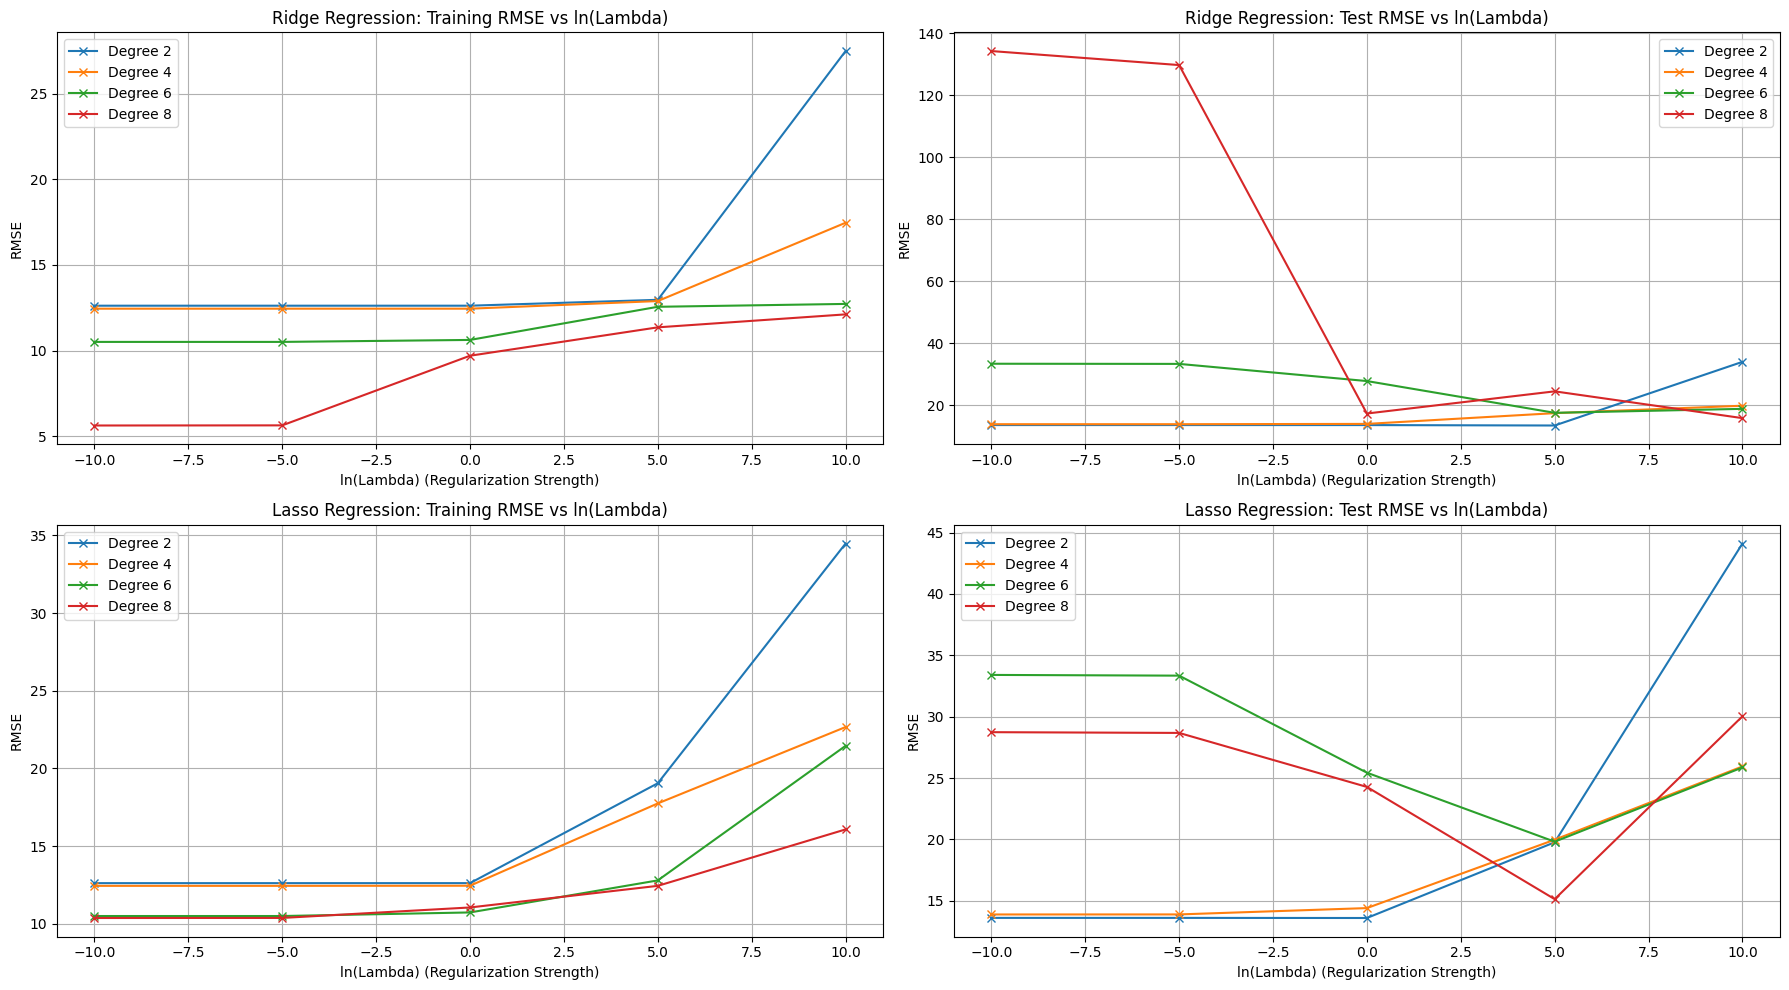

In [6]:
# Create summary plots comparing RMSE across different lambdas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

# Plot Ridge RMSE for training data
for degree_idx, degree in enumerate(degrees):
    axes[0][0].plot(ln_lambdas, ridge_rmse_train[degree_idx], marker='x', label=f'Degree {degree}')
axes[0][0].set_xlabel('ln(Lambda) (Regularization Strength)')
axes[0][0].set_ylabel('RMSE')
axes[0][0].set_title('Ridge Regression: Training RMSE vs ln(Lambda)')
axes[0][0].legend()
axes[0][0].grid(True)

# Plot Ridge RMSE for test data
for degree_idx, degree in enumerate(degrees):
    axes[0][1].plot(ln_lambdas, ridge_rmse_test[degree_idx], marker='x', label=f'Degree {degree}')
axes[0][1].set_xlabel('ln(Lambda) (Regularization Strength)')
axes[0][1].set_ylabel('RMSE')
axes[0][1].set_title('Ridge Regression: Test RMSE vs ln(Lambda)')
axes[0][1].legend()
axes[0][1].grid(True)

# Plot Lasso RMSE for training data
for degree_idx, degree in enumerate(degrees):
    axes[1][0].plot(ln_lambdas, lasso_rmse_train[degree_idx], marker='x', label=f'Degree {degree}')
axes[1][0].set_xlabel('ln(Lambda) (Regularization Strength)')
axes[1][0].set_ylabel('RMSE')
axes[1][0].set_title('Lasso Regression: Training RMSE vs ln(Lambda)')
axes[1][0].legend()
axes[1][0].grid(True)

# Plot Lasso RMSE for test data
for degree_idx, degree in enumerate(degrees):
    axes[1][1].plot(ln_lambdas, lasso_rmse_test[degree_idx], marker='x', label=f'Degree {degree}')
axes[1][1].set_xlabel('ln(Lambda) (Regularization Strength)')
axes[1][1].set_ylabel('RMSE')
axes[1][1].set_title('Lasso Regression: Test RMSE vs ln(Lambda)')
axes[1][1].legend()
axes[1][1].grid(True)


plt.tight_layout()
plt.show()